In [1]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import numpy as np
import matplotlib.pyplot as plt
import av
import Sandpile as sp
import time
%load_ext autoreload
%autoreload 2

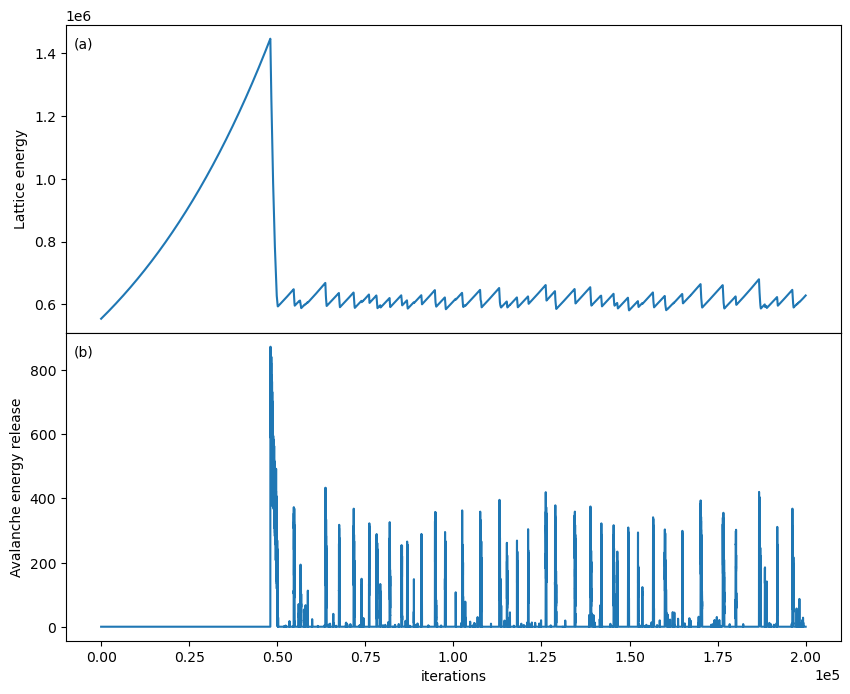

In [4]:
a1 = av.av_model(100, Nx=20, Ny=20)
a1.eps_drive = 1e-5
a1.sigma2 = -1
a1.D_nc = 1
# a1.name = 'D12'
a1.do_soc(Niter=int(2e5), doplot=1, finish_with_soc=True)
# saved_state = np.copy(a1.B)

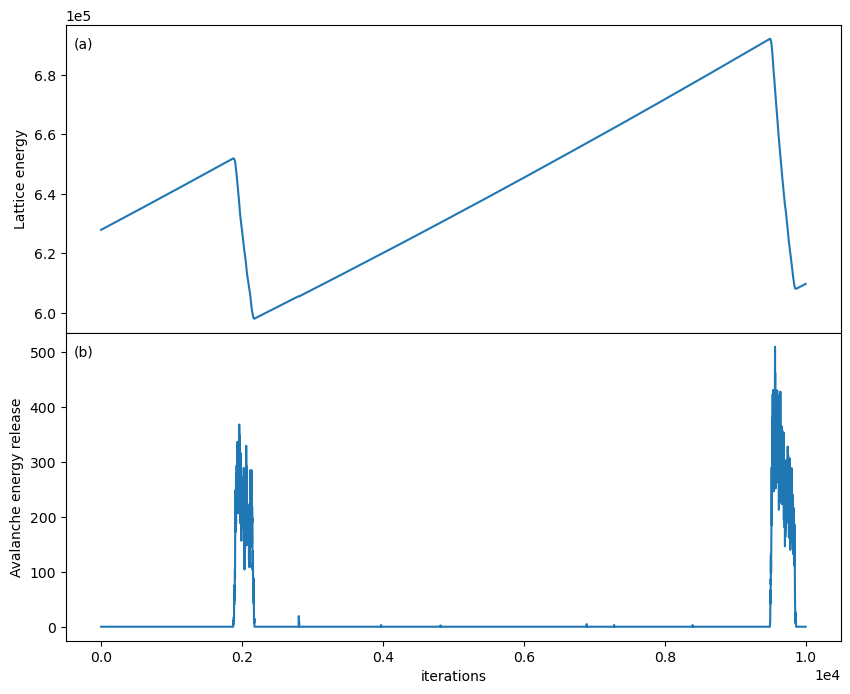

0.25


In [5]:
start = time.time()
a1.do_soc(Niter=int(1e4), doplot=1, finish_with_soc=True)
print(round(time.time()-start, 2))

The loop took 1.25 seconds
1.55


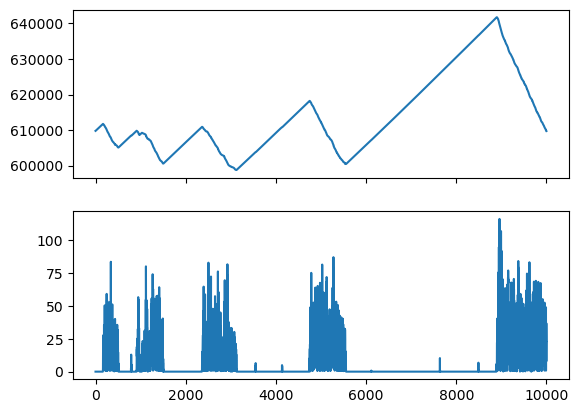

In [6]:
aJax = sp.Sandpile(20)
aJax.B = np.copy(a1.B)
start = time.time()
rel_e, lat_e = aJax.loop_(1e4, verbose=True)
print(round(time.time()-start, 2))
fig, axs = plt.subplots(2,1, sharex=True)
axs[0].plot(lat_e)
axs[1].plot(rel_e)
plt.show()